In [1]:
# import findspark
# findspark.init('/home/ubuntu/spark-3.0.1-bin-hadoop2.7')
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from IPython.core.display import HTML

display(HTML("<style>pre { white-space: pre !important; }</style>"))

spark = SparkSession.builder.appName('722-BDAS-bgao150').getOrCreate()

# Step 3
## Load data and transformation

In [2]:
data_nasdaq = spark.read.csv('data/Nasdaq-composite.csv', header=True, inferSchema=True)
data_btc = spark.read.csv('data/price-crypto-bitcoin.csv', header=True, inferSchema=True)
data_eth = spark.read.csv('data/price-crypto-ethereum.csv', header=True, inferSchema=True)
data_gold = spark.read.csv('data/price-gold.csv', header=True, inferSchema=True)

joint_data = data_nasdaq.join(data_btc, ['Date'],how='left')
joint_data = joint_data.join(data_eth, ['Date'],how='left')
joint_data = joint_data.join(data_gold, ['Date'],how='left')

In [3]:
print("rows: " + str(joint_data.count()), "columns: " + str(len(joint_data.columns)))
joint_data.show(10)

rows: 1129 columns: 47
+---------+-----------+-----------+-----------+------------+----------------+-------------+------------------+----------+--------+--------+-------+---------+--------------+---------------+------------------+----------+--------+--------+-------+---------+--------------+---------------+---------------+----------+-----------------+-------------------+---------------------+----------------+-----------------+----------------------+---------------+-----------------+----------------+----------------------+---------------+--------------+--------------------+-------------------+---------------+-----------+------------------+----------------+-----------------------+-----------------------+----------------------+----------------------+
|     Date|nasdaq_Open|nasdaq_High| nasdaq_Low|nasdaq_Close|nasdaq_Adj_Close|nasdaq_Volume|btc_Unix_Timestamp|btc_Symbol|btc_Open|btc_High|btc_Low|btc_Close|btc_Volume_btc|btc_Volume_USDT|eth_Unix_Timestamp|eth_Symbol|eth_Open|eth_High|eth_Lo

In [4]:
joint_data.printSchema()

root
 |-- Date: string (nullable = true)
 |-- nasdaq_Open: double (nullable = true)
 |-- nasdaq_High: double (nullable = true)
 |-- nasdaq_Low: double (nullable = true)
 |-- nasdaq_Close: double (nullable = true)
 |-- nasdaq_Adj_Close: double (nullable = true)
 |-- nasdaq_Volume: long (nullable = true)
 |-- btc_Unix_Timestamp: integer (nullable = true)
 |-- btc_Symbol: string (nullable = true)
 |-- btc_Open: double (nullable = true)
 |-- btc_High: double (nullable = true)
 |-- btc_Low: double (nullable = true)
 |-- btc_Close: double (nullable = true)
 |-- btc_Volume_btc: double (nullable = true)
 |-- btc_Volume_USDT: double (nullable = true)
 |-- eth_Unix_Timestamp: integer (nullable = true)
 |-- eth_Symbol: string (nullable = true)
 |-- eth_Open: double (nullable = true)
 |-- eth_High: double (nullable = true)
 |-- eth_Low: double (nullable = true)
 |-- eth_Close: double (nullable = true)
 |-- eth_Volume_btc: double (nullable = true)
 |-- eth_Volume_USDT: double (nullable = true)
 |--

In [5]:
selected_df = joint_data.drop(  "gold_Euro2",
                                "gold_Japanese yen",
                                "gold_Pound sterling",
                                "gold_Canadian dollar5",
                                "gold_Swiss franc",
                                "gold_Indian rupee",
                                "gold_Chinese renmimbi8",
                                "gold_US dollar9",
                                "gold_Turkish lira",
                                "gold_Saudi riyal",
                                "gold_Indonesian rupiah",
                                "gold_UAE dirham",
                                "gold_Thai baht",
                                "gold_Vietnamese dong",
                                "gold_Egyptian pound",
                                "gold_Korean won",
                                "gold_Euro18",
                                "gold_Russian ruble",
                                "gold_US dollar20",
                                "gold_South African rand",
                                "gold_Chinese renmimbi22",
                                "gold_Canadian dollar23",
                                "gold_Australian dollar",
                                "btc_Symbol",
                                "eth_Unix_Timestamp",
                                "eth_Symbol",
                                "btc_Unix_Timestamp"
                               )

selected_df = selected_df.withColumn("gold_US dollar", F.col("gold_US dollar1"))
selected_df = selected_df.drop("gold_US dollar1")
print(len(selected_df.columns))
selected_df.show(10)

20
+---------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+
|     Date|nasdaq_Open|nasdaq_High| nasdaq_Low|nasdaq_Close|nasdaq_Adj_Close|nasdaq_Volume|btc_Open|btc_High|btc_Low|btc_Close|btc_Volume_btc|btc_Volume_USDT|eth_Open|eth_High|eth_Low|eth_Close|eth_Volume_btc|eth_Volume_USDT|gold_US dollar|
+---------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+
|7/17/2017|6320.350098|6330.970215|6307.339844| 6314.430176|     6314.430176|   1558030000|    null|    null|   null|     null|          null|           null|    null|    null|   null|     null|          null|           null|      1,234.10|
|7/18/2017|6304.819824|6344.54980

In [6]:
selected_df = selected_df.withColumn("Date", F.to_date(F.col("Date"), "M/d/yyyy"))
print("rows: " + str(selected_df.count()), "columns: " + str(len(selected_df.columns)))

selected_df.registerTempTable("prices")
selected_df = spark.sql("select * from prices where Date >  cast('2017-8-16' as date) order by Date")
print("rows: " + str(selected_df.count()), "columns: " + str(len(selected_df.columns)))

selected_df.show(10)

rows: 1129 columns: 20
rows: 1098 columns: 20
+----------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+
|      Date|nasdaq_Open|nasdaq_High| nasdaq_Low|nasdaq_Close|nasdaq_Adj_Close|nasdaq_Volume|btc_Open|btc_High|btc_Low|btc_Close|btc_Volume_btc|btc_Volume_USDT|eth_Open|eth_High|eth_Low|eth_Close|eth_Volume_btc|eth_Volume_USDT|gold_US dollar|
+----------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+
|2017-08-17|6322.720215| 6334.22998|6221.910156| 6221.910156|     6221.910156|   2041220000| 4469.93| 4485.39|4200.74|  4285.08|        647.86|     2812379.11|  303.61|  312.18| 298.21|    302.0|       6155.32|     1890017.53|  

## Fill missing data

In [7]:
from pyspark.sql import Window
import sys

# define the window
window = Window.orderBy('Date').rowsBetween(-sys.maxsize, 0)

names = [c for c in selected_df.schema.names if c not in ["Date"]] 
filled_df = selected_df
for name in names:
    filled_column = F.last(selected_df[name], ignorenulls=True).over(window)
    filled_df = filled_df.withColumn(name,  filled_column)

filled_df.show(10)

+----------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+
|      Date|nasdaq_Open|nasdaq_High| nasdaq_Low|nasdaq_Close|nasdaq_Adj_Close|nasdaq_Volume|btc_Open|btc_High|btc_Low|btc_Close|btc_Volume_btc|btc_Volume_USDT|eth_Open|eth_High|eth_Low|eth_Close|eth_Volume_btc|eth_Volume_USDT|gold_US dollar|
+----------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+
|2017-08-17|6322.720215| 6334.22998|6221.910156| 6221.910156|     6221.910156|   2041220000| 4469.93| 4485.39|4200.74|  4285.08|        647.86|     2812379.11|  303.61|  312.18| 298.21|    302.0|       6155.32|     1890017.53|      1,285.20|
|2017-08-18|6222.459961|6254.220

In [8]:
t= filled_df.drop("Date")
t.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in t.columns]).toPandas().transpose()

,0
nasdaq_Open,0
nasdaq_High,0
nasdaq_Low,0
nasdaq_Close,0
nasdaq_Adj_Close,0
nasdaq_Volume,0
btc_Open,0
btc_High,0
btc_Low,0
btc_Close,0


## Data Construction

In [9]:
filled_df = filled_df.withColumn("gold_typical_price", F.col("gold_US dollar"))
filled_df = filled_df.withColumn("nasdaq_typical_price", (F.col("nasdaq_Close") + F.col("nasdaq_High") + F.col("nasdaq_Low")) /3)
filled_df = filled_df.withColumn("btc_typical_price", (F.col("btc_High") + F.col("btc_Low") + F.col("btc_Close")) /3)
filled_df = filled_df.withColumn("eth_typical_price", (F.col("eth_High") + F.col("eth_Low") + F.col("eth_Close")) /3)
filled_df.show(10)

+----------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+------------------+--------------------+------------------+------------------+
|      Date|nasdaq_Open|nasdaq_High| nasdaq_Low|nasdaq_Close|nasdaq_Adj_Close|nasdaq_Volume|btc_Open|btc_High|btc_Low|btc_Close|btc_Volume_btc|btc_Volume_USDT|eth_Open|eth_High|eth_Low|eth_Close|eth_Volume_btc|eth_Volume_USDT|gold_US dollar|gold_typical_price|nasdaq_typical_price| btc_typical_price| eth_typical_price|
+----------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+------------------+--------------------+------------------+------------------+
|2017-08-17|6322.720215| 6334.22998|6221

In [10]:
filled_df = filled_df.withColumn("gold_typical_price", F.regexp_replace("gold_typical_price", ',', '').cast('float'))

filled_df = filled_df.withColumn('timestamp', filled_df.Date.cast('timestamp'))

w = Window.orderBy(F.col("timestamp").cast('long')).rangeBetween(-20*86400, 0)

filled_df = filled_df.withColumn('nasdaq_sma20', F.avg("nasdaq_typical_price").over(w))
filled_df = filled_df.withColumn('gold_sma20', F.avg("gold_typical_price").over(w))
filled_df = filled_df.withColumn('btc_sma20', F.avg("btc_typical_price").over(w))
filled_df = filled_df.withColumn('eth_sma20', F.avg("eth_typical_price").over(w))

filled_df = filled_df.withColumn('nasdaq_bollinger_band', F.col("nasdaq_sma20") + 2 * F.stddev("nasdaq_typical_price").over(w))
filled_df = filled_df.withColumn('gold_bollinger_band', F.col("gold_sma20") + 2 * F.stddev("gold_typical_price").over(w))
filled_df = filled_df.withColumn('btc_bollinger_band', F.col("btc_sma20") + 2 * F.stddev("btc_typical_price").over(w))
filled_df = filled_df.withColumn('eth_bollinger_band', F.col("eth_sma20") + 2 * F.stddev("eth_typical_price").over(w))
filled_df.show(10)

+----------+-----------+-----------+-----------+------------+----------------+-------------+--------+--------+-------+---------+--------------+---------------+--------+--------+-------+---------+--------------+---------------+--------------+------------------+--------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+---------------------+-------------------+------------------+------------------+
|      Date|nasdaq_Open|nasdaq_High| nasdaq_Low|nasdaq_Close|nasdaq_Adj_Close|nasdaq_Volume|btc_Open|btc_High|btc_Low|btc_Close|btc_Volume_btc|btc_Volume_USDT|eth_Open|eth_High|eth_Low|eth_Close|eth_Volume_btc|eth_Volume_USDT|gold_US dollar|gold_typical_price|nasdaq_typical_price| btc_typical_price| eth_typical_price|          timestamp|     nasdaq_sma20|        gold_sma20|         btc_sma20|         eth_sma20|nasdaq_bollinger_band|gold_bollinger_band|btc_bollinger_band|eth_bollinger_band|
+---------

# step 4


rows: 1098 columns: 33
rows: 1097 columns: 33


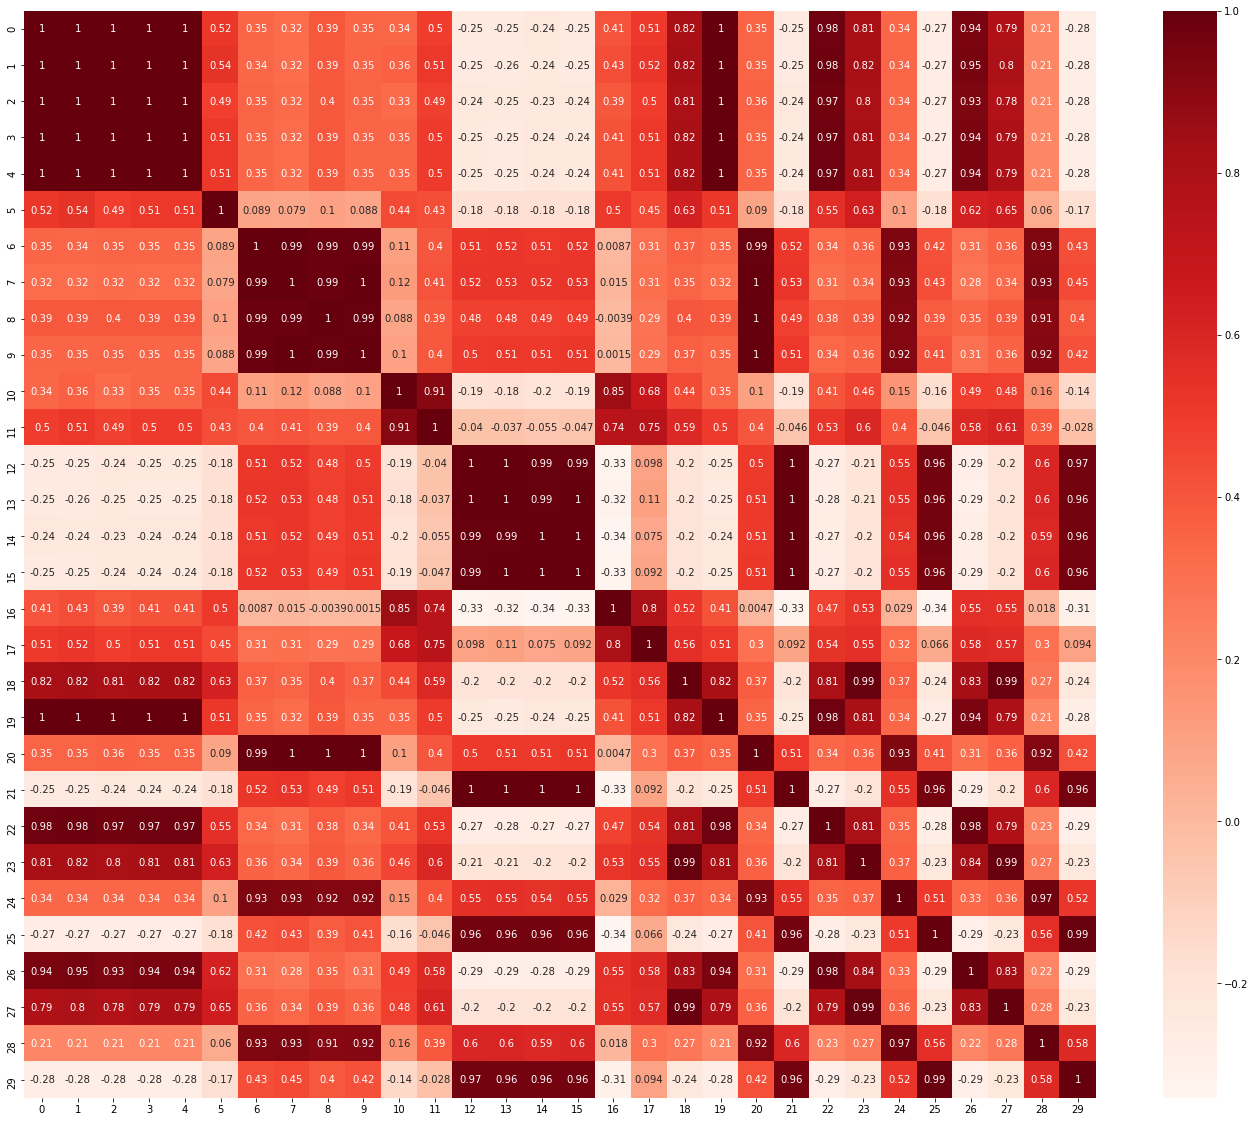

In [11]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns

print("rows: " + str(filled_df.count()), "columns: " + str(len(filled_df.columns)))
filled_df=filled_df.dropna(how='any')
print("rows: " + str(filled_df.count()), "columns: " + str(len(filled_df.columns)))

vector_col = "corr_features"
inputCols= [c for c in filled_df.schema.names if c not in ["Date", "timestamp", "gold_US dollar"]]
assembler = VectorAssembler(inputCols= inputCols,
                            outputCol=vector_col)
df_vector = assembler.transform(filled_df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

plt.figure(figsize=(24, 20))
corr = matrix.collect()[0]["pearson({})".format(vector_col)].values.reshape(30, 30)
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()
# print(matrix.collect()[0]["pearson({})".format(vector_col)].values.reshape(30, 30))

In [12]:

# get the selected features
target_index = inputCols.index("btc_typical_price")
target_corr = corr[target_index]  #inputCols[target_index] is the correlation for the target field
select_features = []

for i in range(len(inputCols)):
    if target_corr[i] >= 0.4 or target_corr[i] <= -0.4:  # abs() functiond doesn't work as over written by pyspark  
           select_features.append(inputCols[i])
           print(inputCols[i], target_corr[i])


btc_Open 0.9938202728665391
btc_High 0.9968850479439088
btc_Low 0.9958009361023322
btc_Close 0.9989374341054619
btc_Volume_USDT 0.4004982950114253
eth_Open 0.5024097240616512
eth_High 0.5097097064005188
eth_Low 0.506397120474437
eth_Close 0.5133951421128776
btc_typical_price 1.0
eth_typical_price 0.5106922847477975
btc_sma20 0.9285327789202903
eth_sma20 0.4117343679777538
btc_bollinger_band 0.9230818715413496
eth_bollinger_band 0.42384954990677415


In [13]:
from pyspark.sql.functions import monotonically_increasing_id

# add id column
filled_df = filled_df.withColumn("id", monotonically_increasing_id())

select_features = [ele for ele in select_features if ele not in [
    "btc_Open",
    "btc_High", 
    "btc_Close", 
    "btc_Low", 
    "eth_Open", 
    "eth_High ",
    "eth_Low", 
    "eth_Close"]] 
select_features.append("Date")
select_features.append("gold_typical_price")
select_features.append("nasdaq_typical_price")
select_features.append("nasdaq_bollinger_band")
select_features.append("gold_bollinger_band")
select_features.append("btc_bollinger_band")
select_features.append("eth_bollinger_band")
select_features.append("id")


print(select_features)

['btc_Volume_USDT', 'eth_High', 'btc_typical_price', 'eth_typical_price', 'btc_sma20', 'eth_sma20', 'btc_bollinger_band', 'eth_bollinger_band', 'Date', 'gold_typical_price', 'nasdaq_typical_price', 'nasdaq_bollinger_band', 'gold_bollinger_band', 'btc_bollinger_band', 'eth_bollinger_band', 'id']


In [14]:

# train/test split
df = filled_df.select(*select_features)
# df.show()

training_count = __builtin__.round(df.count()* 0.7)
train = df.limit(training_count)

df.registerTempTable("prices")
test = spark.sql("select * from prices where Date >  cast('"+ str(train.select("Date").collect()[training_count-1]["Date"]) +"' as date) order by Date")
test.show(10)

+---------------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+------------------+---+
|btc_Volume_USDT|eth_High|btc_typical_price| eth_typical_price|        btc_sma20|         eth_sma20|btc_bollinger_band|eth_bollinger_band|      Date|gold_typical_price|nasdaq_typical_price|nasdaq_bollinger_band|gold_bollinger_band|btc_bollinger_band|eth_bollinger_band| id|
+---------------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+------------------+---+
|  4.663573497E8|  174.85|8458.563333333334|168.89666666666668|10082.27888888889|190.05698412698413|11086.390578573599|  223.957827899162|2019-09-25|            1528.8|   8035.98

# Step 6

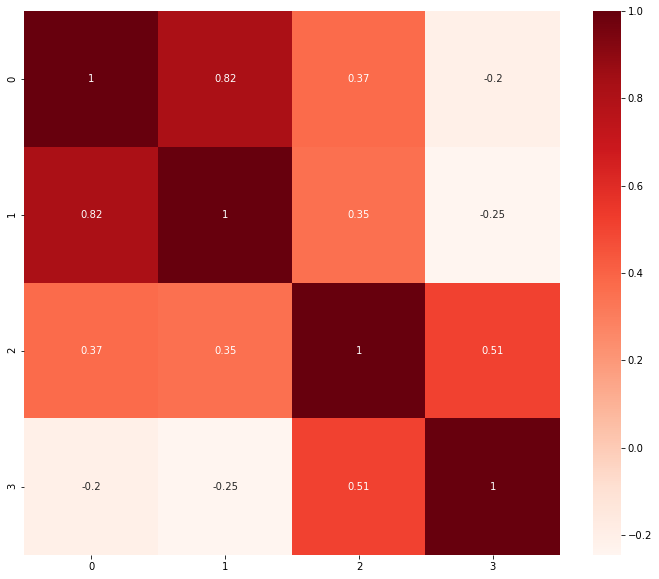

In [15]:
vector_col = "corr_features"
inputCols= [c for c in filled_df.schema.names if c in ["btc_typical_price", "eth_typical_price", "gold_typical_price", "nasdaq_typical_price"]]
assembler = VectorAssembler(inputCols= inputCols,
                            outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

plt.figure(figsize=(12, 10))
corr = matrix.collect()[0]["pearson({})".format(vector_col)].values.reshape(4, 4)
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

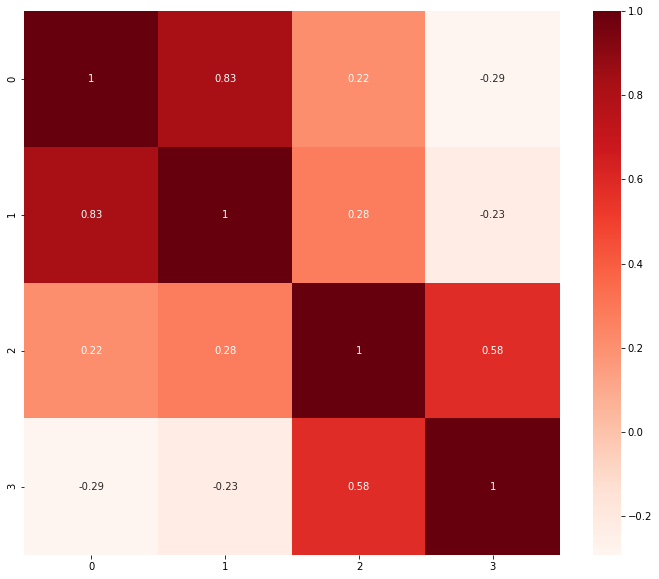

In [16]:

inputCols= [c for c in filled_df.schema.names if c in  ["btc_bollinger_band", "eth_bollinger_band", "gold_bollinger_band", "nasdaq_bollinger_band"]]
assembler = VectorAssembler(inputCols= inputCols,
                            outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

plt.figure(figsize=(12, 10))
corr = matrix.collect()[0]["pearson({})".format(vector_col)].values.reshape(4, 4)
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Step 7

In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline


print("=========================model training =========================================")
assembler = VectorAssembler(inputCols=["btc_typical_price"], outputCol="btc_typical_price_vec")
scaler = MinMaxScaler(inputCol="btc_typical_price_vec", outputCol="btc_typical_price_normalized")
pipeline = Pipeline(stages=[assembler, scaler])
scalerModel = pipeline.fit(df) # use train dataset
feature_selected_df = scalerModel.transform(train)
feature_selected_df.show(10)


train_input = []
train_label = []
# transform dateset with 28 time steps and 1 output. it takes few minutes
feature_selected_df.cache()
count = feature_selected_df.count()
for i in range(27, count):
    time_step = feature_selected_df.where(F.col("id").between(i-27, i)).select("btc_typical_price_normalized").collect()
    time_step_array = [row["btc_typical_price_normalized"][0] for row in time_step]  # same as np.squeeze()
    lable = feature_selected_df.where(F.col("id").between(i, i)).select("btc_typical_price_normalized").collect()
    lable_array = [row.btc_typical_price_normalized[0] for row in lable]  # same as np.squeeze()
    train_input.append(time_step_array)
    train_label.append(lable_array)
    if i % 30 == 0:
        print(i, "out of", count)

# transform the data to fit the input of LSTM
train_input = np.array(train_input)
train_label = np.array(train_label)
train_input = np.reshape(train_input, (train_input.shape[0], train_input.shape[1], 1))  
    
print("start training")

# LSTM layers
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, return_sequences=True, input_shape=(28, 1)))  # layer 1
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=64, return_sequences=True))  # layer 2
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=64))  # layer 3
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))  # output layer
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
train_input = np.asarray(train_input).astype(np.float32)
train_label = np.asarray(train_label).astype(np.float32)
lstm_model.fit(train_input, train_label, epochs=50, batch_size=30)

=========================model training =========================================
+---------------+--------+------------------+------------------+------------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+------------------+---+---------------------+----------------------------+
|btc_Volume_USDT|eth_High| btc_typical_price| eth_typical_price|         btc_sma20|         eth_sma20|btc_bollinger_band|eth_bollinger_band|      Date|gold_typical_price|nasdaq_typical_price|nasdaq_bollinger_band|gold_bollinger_band|btc_bollinger_band|eth_bollinger_band| id|btc_typical_price_vec|btc_typical_price_normalized|
+---------------+--------+------------------+------------------+------------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+------------

25/25 [==============================] - 1s 33ms/step - loss: 0.0013
Epoch 40/50
25/25 [==============================] - 1s 33ms/step - loss: 0.0012
Epoch 41/50
25/25 [==============================] - 1s 33ms/step - loss: 0.0013
Epoch 42/50
25/25 [==============================] - 1s 32ms/step - loss: 0.0014
Epoch 43/50
25/25 [==============================] - 1s 32ms/step - loss: 0.0012
Epoch 44/50
25/25 [==============================] - 1s 32ms/step - loss: 0.0010
Epoch 45/50
25/25 [==============================] - 1s 34ms/step - loss: 9.4472e-04
Epoch 46/50
25/25 [==============================] - 1s 32ms/step - loss: 0.0011
Epoch 47/50
25/25 [==============================] - 1s 34ms/step - loss: 0.0013
Epoch 48/50
25/25 [==============================] - 1s 34ms/step - loss: 0.0011
Epoch 49/50
25/25 [==============================] - 1s 33ms/step - loss: 0.0014
Epoch 50/50
25/25 [==============================] - 1s 33ms/step - loss: 0.0011


In [18]:
print("=========================price prediction =========================================")

# transform dateset with 28 time steps and 1 output
test_df = scalerModel.transform(test) # normalize the price
test_df.show(10)

# reindex the dataset
test_df = test_df.withColumn("id", monotonically_increasing_id())

test_input = []
test_df.cache()
count = test_df.count()
for i in range(27, count):
    time_step = test_df.where(F.col("id").between(i-27, i)).select("btc_typical_price_normalized").collect()
    time_step_array = [row["btc_typical_price_normalized"][0] for row in time_step]  # same as np.squeeze()
    test_input.append(time_step_array)
    if i % 30 == 0:
        print(i, "out of", count)

test_input = np.array(test_input)
test_input = np.reshape(test_input, (test_input.shape[0], test_input.shape[1], 1))  # transform the data to fit the input of LSTM


=========================price prediction =========================================
+---------------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+------------------+---+---------------------+----------------------------+
|btc_Volume_USDT|eth_High|btc_typical_price| eth_typical_price|        btc_sma20|         eth_sma20|btc_bollinger_band|eth_bollinger_band|      Date|gold_typical_price|nasdaq_typical_price|nasdaq_bollinger_band|gold_bollinger_band|btc_bollinger_band|eth_bollinger_band| id|btc_typical_price_vec|btc_typical_price_normalized|
+---------------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+----------------

In [19]:
# prediction
predicted_btc_price = lstm_model.predict(test_input)


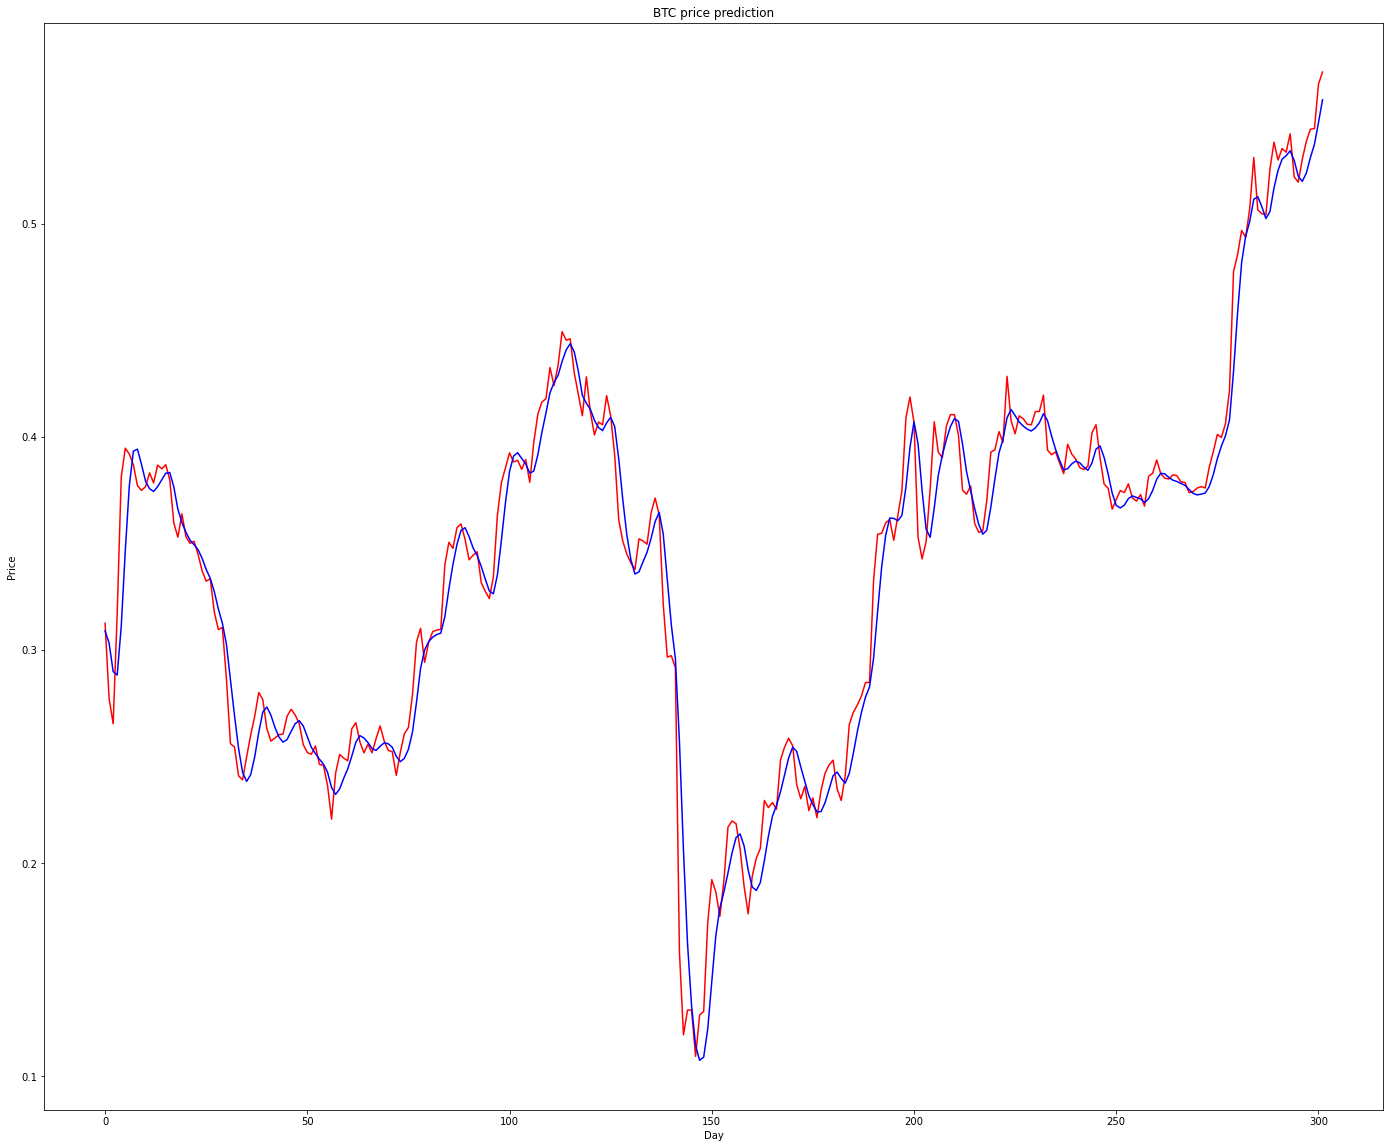

In [20]:

plt.clf()
plt.cla()
plt.close()

plt.figure(figsize=(24, 20))

plt.plot(np.squeeze(test_df.select("btc_typical_price_normalized").collect())[27:], color='red',
         label='Real BTC Price')
plt.plot(np.squeeze(predicted_btc_price), color='blue', label='Predicted BTC Price')
plt.title('BTC price prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()



In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test_array = np.squeeze(test_df.select("btc_typical_price_normalized").collect())[27:] # offset for time steps
predicted_array = np.squeeze(predicted_btc_price)


for x in range(6):
    error = mean_absolute_percentage_error(test_array[50*x:50*x+50], predicted_array[50*x:50*x+50])
    print("error day from", 50*x, "to", 50*x+50, ": ",error)


error day from 0 to 50 :  3.7513448222019443
error day from 50 to 100 :  2.8960574101098353
error day from 100 to 150 :  6.736896140693065
error day from 150 to 200 :  5.225096847888727
error day from 200 to 250 :  2.4069287992274884
error day from 250 to 300 :  1.6457841649172367


# Step 8

In [22]:
df.cache()
btc_typical_price_array= [val.btc_typical_price for val in df.select('btc_typical_price').collect()]
nasdaq_typical_price_array = [val.nasdaq_typical_price for val in df.select('nasdaq_typical_price').collect()]

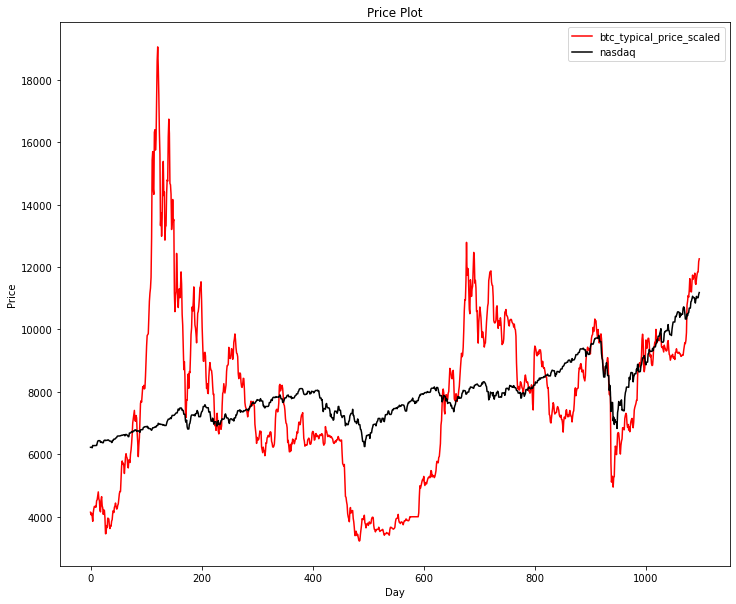

In [23]:
plt.figure(figsize=(12, 10))

plt.plot(btc_typical_price_array, color='red',label='btc_typical_price_scaled')
plt.plot(nasdaq_typical_price_array, color='black',label='nasdaq')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Price Plot')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()


In [24]:
print("=========================update LSTM algorithm parameters=========================================")
train_input = []
train_label = []
# transform dateset with 50 time steps and 1 output. it takes few minutes
feature_selected_df.cache()
count = feature_selected_df.count()
for i in range(49, count):
    time_step = feature_selected_df.where(F.col("id").between(i-49, i)).select("btc_typical_price_normalized").collect()
    time_step_array = [row["btc_typical_price_normalized"][0] for row in time_step]  # same as np.squeeze()
    lable = feature_selected_df.where(F.col("id").between(i, i)).select("btc_typical_price_normalized").collect()
    lable_array = [row.btc_typical_price_normalized[0] for row in lable]  # same as np.squeeze()
    train_input.append(time_step_array)
    train_label.append(lable_array)
    if i % 30 == 0:
        print(i, "out of", count)

# transform the data to fit the input of LSTM
train_input = np.array(train_input)
train_label = np.array(train_label)
train_input = np.reshape(train_input, (train_input.shape[0], train_input.shape[1], 1))  
    
print("start training")

# LSTM layers
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, return_sequences=True, input_shape=(50, 1)))  # layer 1
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=64, return_sequences=True))  # layer 2
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=64))  # layer 3
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))  # output layer
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
train_input = np.asarray(train_input).astype(np.float32)
train_label = np.asarray(train_label).astype(np.float32)
lstm_model.fit(train_input, train_label, epochs=50, batch_size=30)


=========================update LSTM algorithm parameters=========================================
60 out of 768
90 out of 768
120 out of 768
150 out of 768
180 out of 768
210 out of 768
240 out of 768
270 out of 768
300 out of 768
330 out of 768
360 out of 768
390 out of 768
420 out of 768
450 out of 768
480 out of 768
510 out of 768
540 out of 768
570 out of 768
600 out of 768
630 out of 768
660 out of 768
690 out of 768
720 out of 768
750 out of 768
start training
Epoch 1/50
24/24 [==============================] - 1s 53ms/step - loss: 0.0188
Epoch 2/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0069
Epoch 3/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0046
Epoch 4/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0044
Epoch 5/50
24/24 [==============================] - 1s 55ms/step - loss: 0.0040
Epoch 6/50
24/24 [==============================] - 1s 55ms/step - loss: 0.0038
Epoch 7/50
24/24 [==============================

In [25]:
print("=========================price prediction =========================================")


test_df = scalerModel.transform(test) # normalize the price
test_df.show(10)

# reindex the dataset
test_df = test_df.withColumn("id", monotonically_increasing_id())

test_input = []
test_df.cache()
count = test_df.count()
# transform dateset with 50 time steps and 1 output
for i in range(49, count):
    time_step = test_df.where(F.col("id").between(i-49, i)).select("btc_typical_price_normalized").collect()
    time_step_array = [row["btc_typical_price_normalized"][0] for row in time_step]  # same as np.squeeze()
    test_input.append(time_step_array)
    if i % 30 == 0:
        print(i, "out of", count)

test_input = np.array(test_input)
test_input = np.reshape(test_input, (test_input.shape[0], test_input.shape[1], 1))  # transform the data to fit the input of LSTM


=========================price prediction =========================================
+---------------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+------------------+---+---------------------+----------------------------+
|btc_Volume_USDT|eth_High|btc_typical_price| eth_typical_price|        btc_sma20|         eth_sma20|btc_bollinger_band|eth_bollinger_band|      Date|gold_typical_price|nasdaq_typical_price|nasdaq_bollinger_band|gold_bollinger_band|btc_bollinger_band|eth_bollinger_band| id|btc_typical_price_vec|btc_typical_price_normalized|
+---------------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+----------+------------------+--------------------+---------------------+-------------------+------------------+----------------

In [26]:
print( "=========================use different parameters for price correlation =========================================")


# convert to vector column first
assembler = VectorAssembler(inputCols=["btc_typical_price", "btc_Volume_USDT"], outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)
print(matrix.collect()[0]["pearson({})".format(vector_col)].values.reshape(2, 2))

=========================use different parameters for price correlation =========================================
[[1.        0.4004983]
 [0.4004983 1.       ]]


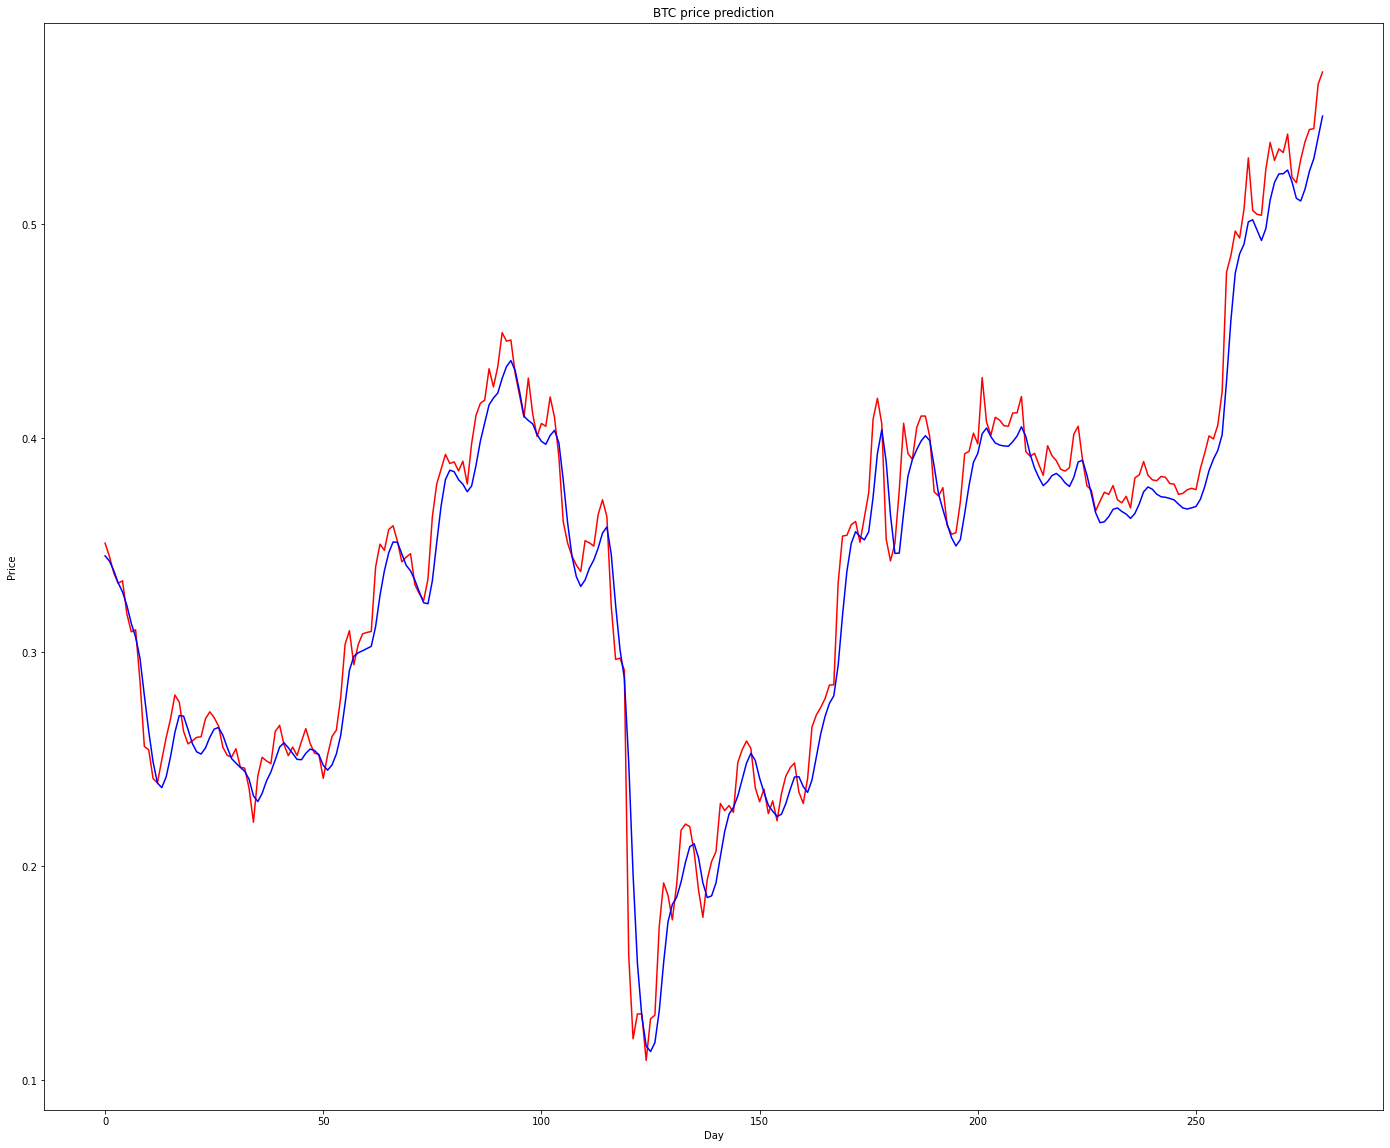

In [27]:
# prediction
predicted_btc_price = lstm_model.predict(test_input)

plt.clf()
plt.cla()
plt.close()

plt.figure(figsize=(24, 20))

plt.plot(np.squeeze(test_df.select("btc_typical_price_normalized").collect())[49:], color='red',
         label='Real BTC Price')
plt.plot(np.squeeze(predicted_btc_price), color='blue', label='Predicted BTC Price')
plt.title('BTC price prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [29]:
test_array = np.squeeze(test_df.select("btc_typical_price_normalized").collect())[49:] # offset for time steps
predicted_array = np.squeeze(predicted_btc_price)


for x in range(6):
    error = mean_absolute_percentage_error(test_array[50*x:50*x+50], predicted_array[50*x:50*x+50])
    print("error day from", 50*x, "to", 50*x+50, ": ",error)

error day from 0 to 50 :  2.632276976550358
error day from 50 to 100 :  2.9978516369314514
error day from 100 to 150 :  7.766743599545486
error day from 150 to 200 :  3.874045385805537
error day from 200 to 250 :  2.170017676757899
error day from 250 to 300 :  3.429088368741172
